In [1]:
import pandas as pd 
import numpy as np
import missingno as msno

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels


# Mission 4

In [4]:
final_data = pd.read_csv(r"C:\Users\Utilisateur\projet 7\final_data.csv")
final_data.head()

,Pays,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj
0,Albania,ALB,2947314,100,728.89795,7297.0,0.32141,25.0,0.815874,2,2994.829902,6.591534,8.004643
1,Albania,ALB,2947314,100,916.66235,7297.0,0.32141,25.0,0.815874,20,2994.829902,6.820739,8.004643
2,Albania,ALB,2947314,100,1010.91600,7297.0,0.32141,25.0,0.815874,45,2994.829902,6.918612,8.004643
3,Albania,ALB,2947314,100,1086.90780,7297.0,0.32141,25.0,0.815874,32,2994.829902,6.991092,8.004643
4,Albania,ALB,2947314,100,1132.69970,7297.0,0.32141,25.0,0.815874,63,2994.829902,7.032359,8.004643


## Le pays d'origine a t-il une influence sur le revenus des individus?

### Visualisation des revenus en fonction des pays de notre liste 

In [5]:
# On crée un nouveau dataframe qui ne contient que les pays de la liste de départ
final_pays = final_data.loc[(final_data["Pays"] == "France") |
                    (final_data["Pays"] == "South Africa") |
                    (final_data["Pays"] == "United States of America") |
                    (final_data["Pays"] == "Cote d'Ivoire") |
                    (final_data["Pays"] == "Central African Republic")|
                    (final_data["Pays"] == "Belgium") |
                    (final_data["Pays"] == "Albania")]
final_pays

,Pays,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj
0,Albania,ALB,2947314,100,728.89795,7297.0,0.321410,25.0,0.815874,2,2994.829902,6.591534,8.004643
1,Albania,ALB,2947314,100,916.66235,7297.0,0.321410,25.0,0.815874,20,2994.829902,6.820739,8.004643
2,Albania,ALB,2947314,100,1010.91600,7297.0,0.321410,25.0,0.815874,45,2994.829902,6.918612,8.004643
3,Albania,ALB,2947314,100,1086.90780,7297.0,0.321410,25.0,0.815874,32,2994.829902,6.991092,8.004643
4,Albania,ALB,2947314,100,1132.69970,7297.0,0.321410,25.0,0.815874,63,2994.829902,7.032359,8.004643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649495,South Africa,ZAF,49779472,100,24553.56800,9602.0,0.682949,74.0,0.677000,86,5617.904880,10.108612,8.633714
3649496,South Africa,ZAF,49779472,100,28858.03100,9602.0,0.682949,74.0,0.677000,38,5617.904880,10.270144,8.633714
3649497,South Africa,ZAF,49779472,100,35750.29000,9602.0,0.682949,74.0,0.677000,97,5617.904880,10.484314,8.633714
3649498,South Africa,ZAF,49779472,100,46297.31600,9602.0,0.682949,74.0,0.677000,96,5617.904880,10.742839,8.633714


### Boites à moustache pour la liste de pays

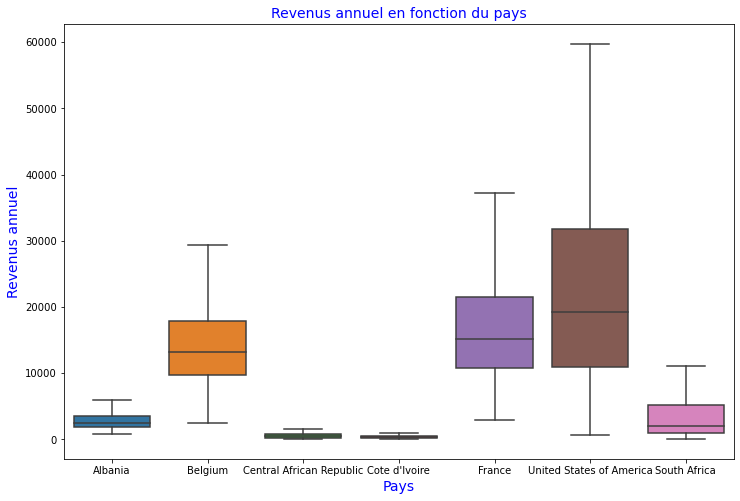

In [6]:
plt.figure(figsize = (12, 8))
plt.title("Revenus annuel en fonction du pays", color = "blue", fontsize = 14)
sn.boxplot( x=final_pays["Pays"], y=final_pays["ychild"], showfliers = False)
plt.xlabel("Pays", fontsize = 14, color = 'blue')
plt.ylabel("Revenus annuel", fontsize = 14, color = "blue")

plt.savefig('Boites à moustache.png')

### ANOVA

#### Lançons ANOVA pour tester l'influence du pays d'origine sur le revenus des individus

In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

####  ANOVA pour tester l'influence du pays d'origine sur le log du revenus des individus

In [8]:
anova_pays_revenu = smf.ols('ychild~ Pays', data = final_pays).fit()
print(anova_pays_revenu.summary())

                            OLS Regression Results                            
Dep. Variable:                 ychild   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                 3.346e+04
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:00:45   Log-Likelihood:            -3.7844e+06
No. Observations:              350000   AIC:                         7.569e+06
Df Residuals:                  349993   BIC:                         7.569e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [9]:
# On met les variables en logarithme
anova_pays_revenu = smf.ols('ln_ychild~ Pays', data = final_pays).fit()
print(anova_pays_revenu.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_ychild   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 2.010e+05
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:00:46   Log-Likelihood:            -4.3502e+05
No. Observations:              350000   AIC:                         8.701e+05
Df Residuals:                  349993   BIC:                         8.701e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

#### ANOVA pour le dataframe complet

In [10]:
anova_pays_revenu = smf.ols('ychild~ Pays', data = final_data).fit()
print(anova_pays_revenu.summary())

                            OLS Regression Results                            
Dep. Variable:                 ychild   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 4.064e+04
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:08:52   Log-Likelihood:            -3.8489e+07
No. Observations:             3699500   AIC:                         7.698e+07
Df Residuals:                 3699426   BIC:                         7.698e+07
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

#### ANOVA pour le dataframe complet en log de revenu

### Test de Fisher

In [11]:
test = sm.stats.anova_lm(anova_pays_revenu, typ =2)
test

,sum_sq,df,F,PR(>F)
Pays,1.890206e+14,73.0,40635.075305,0.0
Residual,2.357326e+14,3699426.0,NaN,NaN


### Calcul du pourcentage de variance expliquée

In [12]:
#Le pourcentage de variance expliquée est donnée par R² dans le résultat obtenu par l'ANOVA, 
#avec R² = R-squared = 0.445.
#On peut le calculer 


SCE = test.iloc[0,0]
SCR = test.iloc[1,0]

R_2_anova  = SCE/(SCE + SCR)
R_2_anova

0.4450128275880083

### Calcul du carré moyen expliqué CME


In [13]:
# CME = SCE / (I - 1)
# SCE = somme des carré expliqué = 1.890206e+14 donnée par la table de fisher (sum_sq, Pays)
#I = nombre_pays = 73  = df_model = nombre de classe
SCE = test.iloc[0,0]
I = 74
CME = SCE / (I - 1)
CME

2589323902392.068

### Calcul le carré moyen résiduel CMR


In [14]:
#CMR = SCR/(n -I)
#SCR = somme des carré résiduel  = 2.357326e+14 donnée par la table de fisher (sum_sq, Residual)
SCR = test.iloc[1,0]
nr = 3699426   
I = 74
CMR = SCR /(nr - I)
CMR

63722675.0174823

### Calcul de la statistique de test F = CME / CMR

In [15]:
F = CME /CMR 
F
# cette valeur est donnée dans le tableau de fisher test(F, Pays)


40634.26247692344

### Vérification que les résultats obtenus par l'ANOVA suivent une loi normale 

In [16]:
X = anova_pays_revenu.resid
X

0         -2265.931952
1         -2078.167552
2         -1983.913902
3         -1907.922102
4         -1862.130202
              ...     
3699495     534.607256
3699496     635.767356
3699497     781.791356
3699498    1010.586856
3699499    1967.106556
Length: 3699500, dtype: float64

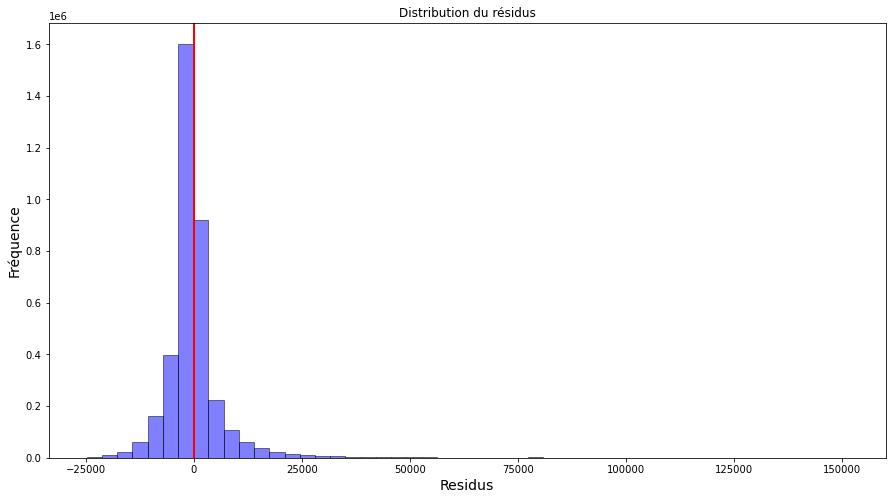

In [52]:
plt.figure(figsize = (15, 8))
X = anova_pays_revenu.resid
X_mean = np.mean(X)
Ecart_type = np.std(X)

plt.hist(X, 50, color = "blue", alpha = 0.5, edgecolor = "black")

plt.axvline(np.mean(anova_pays_revenu.resid), color='r', linewidth=2)

plt.xlabel('Residus', fontsize=14)
plt.ylabel("Fréquence", fontsize=14)
plt.title("Distribution du résidus")
#plt.xlim(0, 16)
plt.savefig('Distribution du résidus.png')

plt.show()

### Le test de Shapiro-Wilk

In [18]:
import scipy.stats as stats
w, pvalue = stats.shapiro(X)
print(w, pvalue)


0.6206124424934387 0.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Test de  Kolmogorov–Smirnov

In [19]:
from scipy.stats import norm,ks_2samp,kstest,bartlett,ttest_ind

print(ks_2samp(X, list(np.random.normal(X_mean, Ecart_type ,3699500))))

KstestResult(statistic=0.21737018516015671, pvalue=0.0)


## Régressions linéaires

 ### Regression linéaires du revenu de l'enfant sur le revenus moyen du pays et sur l'indice de gini

In [20]:
reg_multi = smf.ols('ychild ~ gini + mj', data = final_data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                 ychild   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.483e+06
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:09:26   Log-Likelihood:            -3.8489e+07
No. Observations:             3699500   AIC:                         7.698e+07
Df Residuals:                 3699497   BIC:                         7.698e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.689e-09     20.858  -2.25e-10      1.0

### Calcul du pourcentage de variance expliquée

In [21]:
anova1 = sm.stats.anova_lm(reg_multi, typ =2)
anova1

,sum_sq,df,F,PR(>F)
gini,7.053755e-12,1.0,1.106989e-19,1.0
mj,1.598374e+14,1.0,2.508427e+06,0.0
Residual,2.357326e+14,3699497.0,NaN,NaN


### Pourcentage de varaince expliquée par le paramètre mj 

In [22]:
SCE = anova1.iloc[1,0]
SCR = anova1.iloc[2,0]
R_2_expl_1 = SCE/(SCE + SCR)
R_2_expl_1

0.4040685941101961

### Pourcentage de variance  expliquée par le paramètre gini

In [23]:
SCEr = anova1.iloc[0,0]
SCR = anova1.iloc[2,0]
R_2_expl_2 = SCEr/(SCEr + SCR)
R_2_expl_2

2.9922694919445936e-26

### Regression linéaires avec le log des revenus 

In [24]:
reg_multi_ln = smf.ols('ln_ychild ~ gini + ln_mj', data = final_data).fit()
print(reg_multi_ln.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_ychild   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                 4.227e+06
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:09:56   Log-Likelihood:            -4.0354e+06
No. Observations:             3699500   AIC:                         8.071e+06
Df Residuals:                 3699497   BIC:                         8.071e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4900      0.004    116.381      0.0

### Amélioration du modèle

In [25]:
ln_reg_multi = smf.ols('ln_ychild ~ gini + ln_mj + ci_parent', data = final_data).fit()
print(ln_reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_ychild   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                 2.818e+06
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:10:04   Log-Likelihood:            -4.0354e+06
No. Observations:             3699500   AIC:                         8.071e+06
Df Residuals:                 3699496   BIC:                         8.071e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4882      0.004    114.569      0.0

## Validation de la  régression en logarithme

### Calcul des leviers

In [26]:
# Les données pour le calcul
n = final_data.shape[0]
p = 4   #['ln_ychild', 'gini', 'ln_mj','ci_parent'] pour le modèle amélioré

# Seuil de levier selon la formule de Belsley
seuil_levier = 2 * p / n
seuil_levier

2.162454385727801e-06

In [27]:
#Calcul de l'influence

influence = ln_reg_multi.get_influence()

#On calcul l'influence dans le but d'avoir une régression plus robuste, il faut détecter les observations influentes.

In [28]:
#Nous allons ajouter la colonne levier dans notre dataframe
final_data["levier"] = influence.hat_matrix_diag
final_data = final_data.sort_values(by = "levier", ascending = False)
final_data.head()

,Pays,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj,levier
3625346,South Africa,ZAF,49779472,100,1824.8065,9602.0,0.682949,74.0,0.677,100,5617.90488,7.509229,8.633714,0.000004
3646646,South Africa,ZAF,49779472,100,1824.8065,9602.0,0.682949,74.0,0.677,100,5617.90488,7.509229,8.633714,0.000004
3626557,South Africa,ZAF,49779472,100,2663.1392,9602.0,0.682949,74.0,0.677,100,5617.90488,7.887261,8.633714,0.000004
3626556,South Africa,ZAF,49779472,100,2607.3188,9602.0,0.682949,74.0,0.677,100,5617.90488,7.866078,8.633714,0.000004
3640702,South Africa,ZAF,49779472,100,192.2945,9602.0,0.682949,74.0,0.677,100,5617.90488,5.259028,8.633714,0.000004


In [29]:
final_data_levier = final_data.groupby(by = ["ISO3"]).mean().reset_index()
final_data_levier = final_data_levier.sort_values(by = "levier", ascending = False )
final_data_levier.head()

,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj,levier
73,ZAF,49779472.0,100.0,5617.904880,9602.00000,0.682949,74.0,0.677000,50.56858,5617.904880,7.717752,8.633714,0.000003
13,COD,58453687.0,100.0,276.016044,303.19305,0.459403,58.0,0.707703,50.46820,276.016044,5.288002,5.620459,0.000003
12,CIV,19605568.0,100.0,399.835204,1526.00000,0.430626,52.0,0.629976,50.46262,399.835204,5.694577,5.991052,0.000002
30,HND,7980955.0,100.0,3296.268419,3628.00000,0.615512,73.0,0.940737,50.42482,3296.268419,7.380957,8.100546,0.000002
10,CAF,4273368.0,100.0,811.299901,685.00000,0.575972,71.0,0.661654,50.59024,811.299901,6.130762,6.698638,0.000002


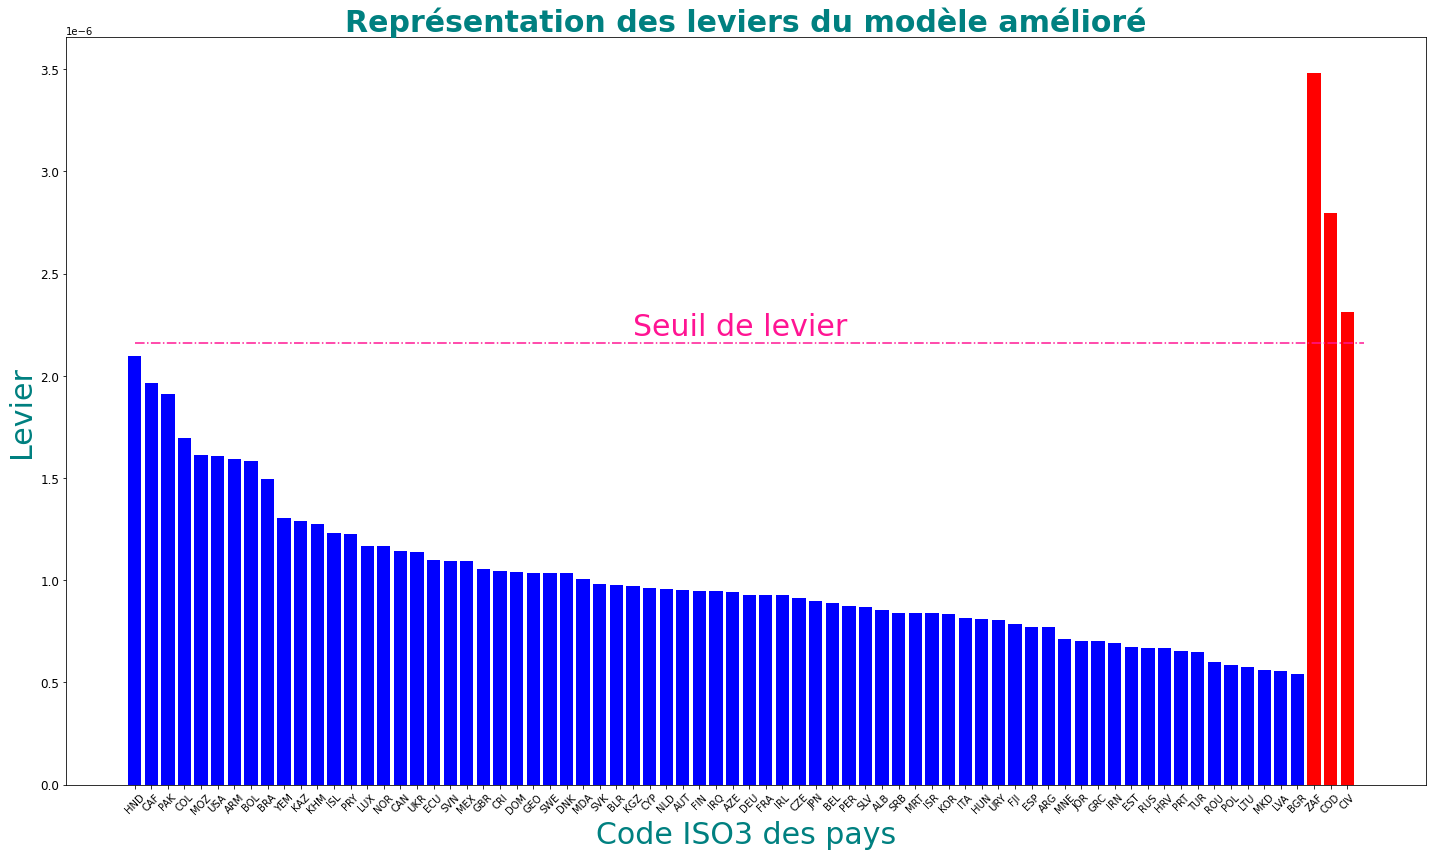

In [53]:
# Reprsentation graphique des leviers en bar
plt.figure(figsize = (20,12))
plt.bar(final_data_levier.loc[final_data_levier["levier"] <= seuil_levier]["ISO3"], 
       final_data_levier.loc[final_data_levier["levier"] <= seuil_levier]["levier"], color = "blue")

plt.bar(final_data_levier.loc[final_data_levier["levier"] > seuil_levier]["ISO3"], 
       final_data_levier.loc[final_data_levier["levier"] > seuil_levier]["levier"], color = "r")


plt.plot([0,74], [seuil_levier, seuil_levier], linestyle = "dashdot", color = "deeppink")
plt.text(30, 0.00000220, "Seuil de levier", fontsize = 30, color = "deeppink")


# Métadonnées 
plt.title("Représentation des leviers du modèle amélioré", fontsize = 30, color = "teal", fontweight = 'bold')
plt.ylabel("Levier", fontsize = 30, color = "teal")
plt.xlabel("Code ISO3 des pays", fontsize = 30, color = "teal")
plt.xticks(np.arange(0, 74, step = 1), fontsize = 10, rotation =45)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig('Seuil de leviers du modèle amélioré.png')
plt.show()

In [31]:
# Sélection des pays dont la valeur est supérieure au seuil
superieur_levier = final_data_levier.loc[final_data_levier["levier"] > seuil_levier, :]
superieur_levier

,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj,levier
73,ZAF,49779472.0,100.0,5617.904880,9602.00000,0.682949,74.0,0.677000,50.56858,5617.904880,7.717752,8.633714,0.000003
13,COD,58453687.0,100.0,276.016044,303.19305,0.459403,58.0,0.707703,50.46820,276.016044,5.288002,5.620459,0.000003
12,CIV,19605568.0,100.0,399.835204,1526.00000,0.430626,52.0,0.629976,50.46262,399.835204,5.694577,5.991052,0.000002


### Calcul des résidus studentisés 

In [32]:
# Calcul du seuil de Student
from scipy.stats import t, shapiro

alpha = 0.05
final_data['rstudent'] = ln_reg_multi.get_influence().resid_studentized_internal

seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

final_data = final_data.sort_values(by = "rstudent", ascending = False)
final_data.head(2)

,Pays,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj,levier,rstudent
3399487,Turkey,TUR,70418612,100,10399.961,11904.0,0.437671,54.0,0.477171,97,6050.465331,9.249557,8.707890,0.000001,4.833319
3338504,Sweden,SWE,9219637,100,6283.115,34371.0,0.272166,4.0,0.259600,20,16184.222707,8.745621,9.691792,0.000001,4.833319


In [33]:
final_data_rstudent = final_data.groupby(by = ["ISO3"]).mean().reset_index()
final_data_rstudent = final_data_rstudent.sort_values(by = "levier", ascending = False )
final_data_rstudent.head()

,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj,levier,rstudent
73,ZAF,49779472.0,100.0,5617.904880,9602.00000,0.682949,74.0,0.677000,50.56858,5617.904880,7.717752,8.633714,0.000003,-0.004664
13,COD,58453687.0,100.0,276.016044,303.19305,0.459403,58.0,0.707703,50.46820,276.016044,5.288002,5.620459,0.000003,0.009780
12,CIV,19605568.0,100.0,399.835204,1526.00000,0.430626,52.0,0.629976,50.46262,399.835204,5.694577,5.991052,0.000002,-0.009866
30,HND,7980955.0,100.0,3296.268419,3628.00000,0.615512,73.0,0.940737,50.42482,3296.268419,7.380957,8.100546,0.000002,-0.015878
10,CAF,4273368.0,100.0,811.299901,685.00000,0.575972,71.0,0.661654,50.59024,811.299901,6.130762,6.698638,0.000002,-0.024824


In [34]:
seuil_rstudent_adapted = seuil_rstudent *0.01
seuil_rstudent_adapted

0.019599646257821676

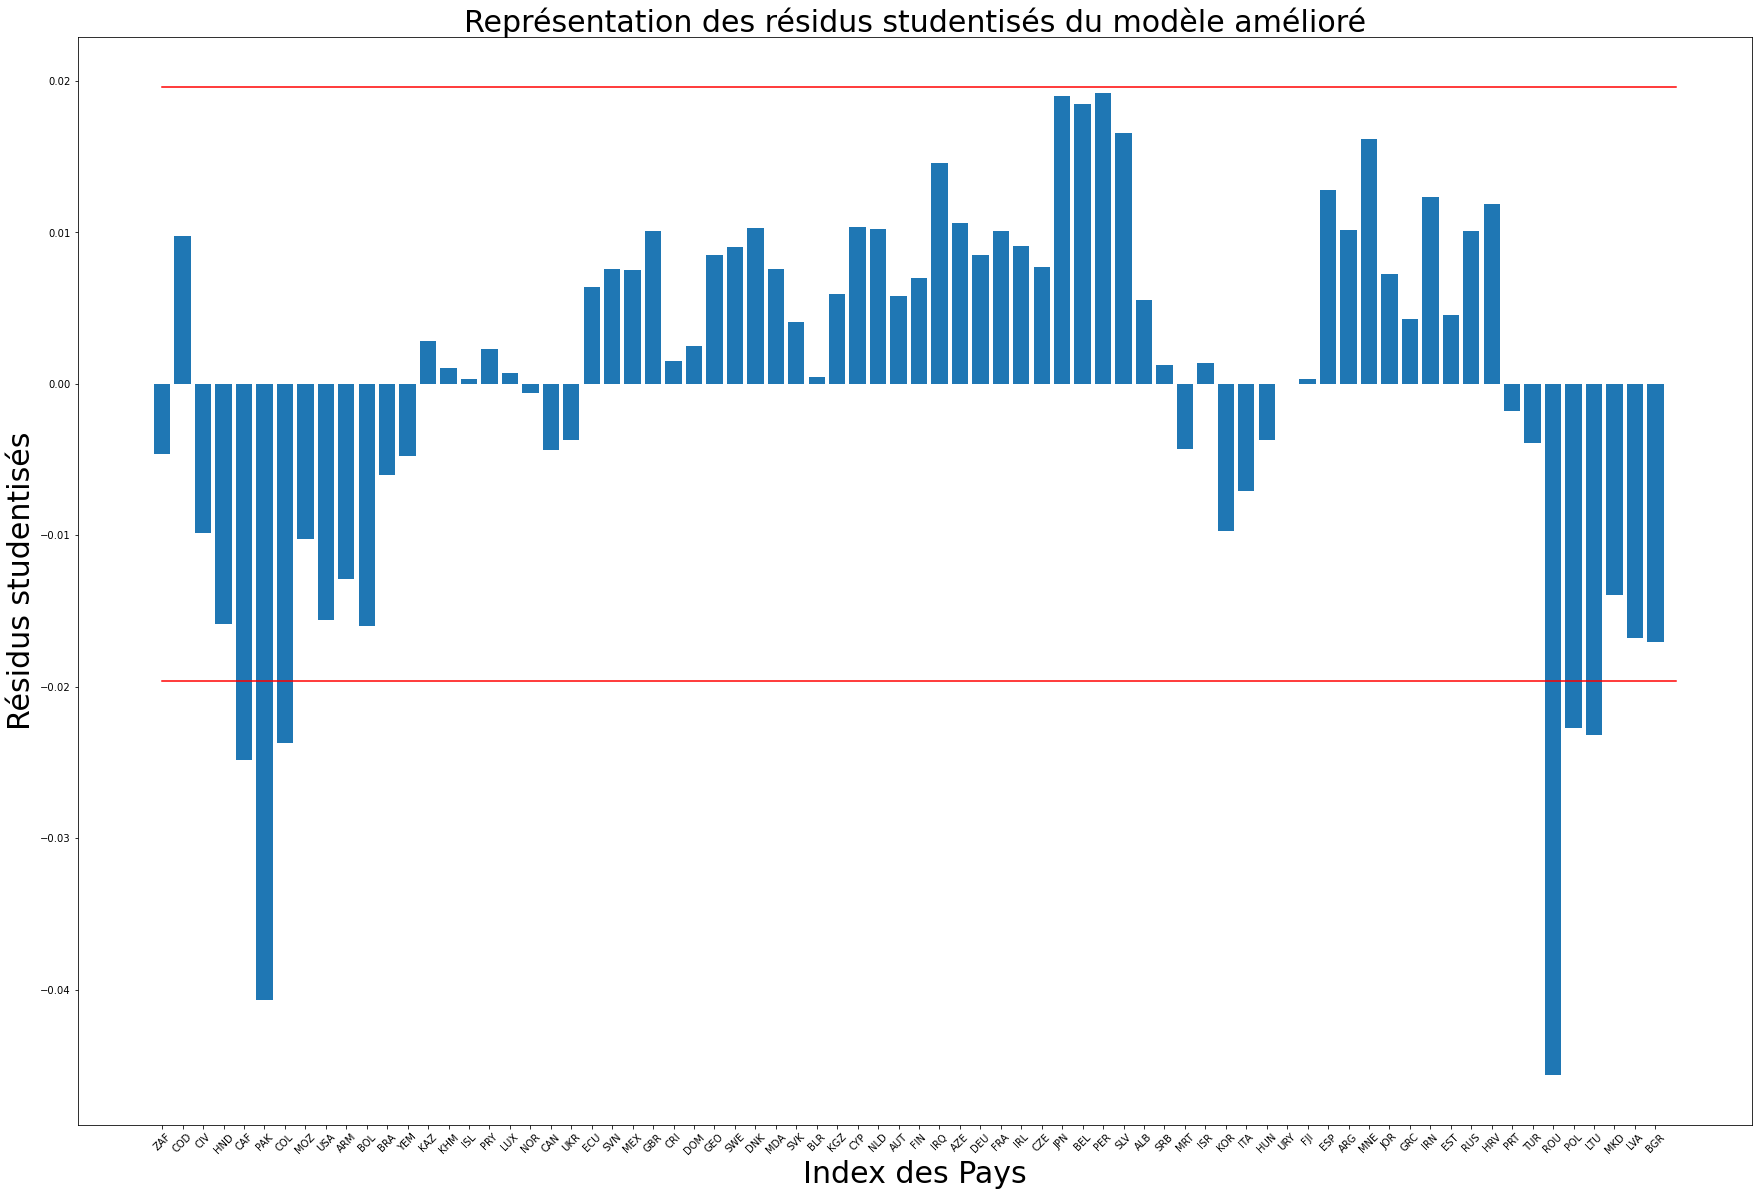

In [54]:
plt.figure(figsize=(30,20))
plt.bar(final_data_rstudent['ISO3'], final_data_rstudent['rstudent'])
plt.xticks(np.arange(0, 74, step=1), fontsize = 10, rotation =45)
plt.title('Représentation des résidus studentisés du modèle amélioré', fontsize = 30)
plt.xlabel('Index des Pays', fontsize = 30)
plt.ylabel('Résidus studentisés', fontsize = 30)
plt.plot([0, 74], [seuil_rstudent_adapted, seuil_rstudent_adapted], color='r')
plt.plot([0, 74], [-seuil_rstudent_adapted, -seuil_rstudent_adapted], color='r')

plt.savefig('Résidus studentisés du modèle amélioré.png')
plt.show()

In [36]:
# Sélection des pays dont la valeur est supérieure au seuil seuil_rstudent_adapted
superieur_levier_student = final_data_rstudent.loc[final_data_rstudent["rstudent"] > seuil_rstudent_adapted, :]
superieur_levier_student.head()

,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj,levier,rstudent


In [37]:
# Sélection des pays dont la valeur est inférieure au seuil seuil_rstudent_adapted
inferieure_levier_student = final_data_rstudent.loc[final_data_rstudent["rstudent"] < -seuil_rstudent_adapted, :]
inferieure_levier_student = inferieure_levier_student.sort_values(by = "rstudent")
inferieure_levier_student

,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj,levier,rstudent
61,ROU,20537875.0,100.0,3318.337189,11782.0,0.389527,46.0,0.369699,50.379700,3318.337189,7.849664,8.107219,6.014768e-07,-0.045653
56,PAK,171648984.0,100.0,887.839279,2335.0,0.316769,21.0,0.450500,50.602660,887.839279,6.642816,6.788791,1.912595e-06,-0.040688
10,CAF,4273368.0,100.0,811.299901,685.0,0.575972,71.0,0.661654,50.590240,811.299901,6.130762,6.698638,1.963787e-06,-0.024824
14,COL,44254972.0,100.0,3547.005276,8185.0,0.583437,72.0,1.095440,50.399180,3547.005275,7.556374,8.173859,1.697693e-06,-0.023725
45,LTU,3198231.0,100.0,6641.247634,17571.0,0.352433,36.0,0.348050,50.508606,6641.247634,8.602139,8.801055,5.737758e-07,-0.023181
58,POL,38125759.0,100.0,5741.720225,16436.0,0.346001,35.0,0.348050,50.570540,5741.720225,8.469103,8.655514,5.836266e-07,-0.022723


## Déterminez la distance de Cook

In [38]:
# Calcul des influences 
#influence = ln_reg_multi.get_influence().summary_frame()
smf = influence.cooks_distance


In [39]:
# Le seuil de la distance de Cook est de n-p.
final_data['dcooks'] = smf[0]

#Seuil de Cook
seuil_dcook = 4/(n-p)
seuil_dcook


1.0812283619174072e-06

In [40]:
final_data_cook = final_data.groupby(by = ["ISO3"]).mean().reset_index()
final_data_cook = final_data_cook.sort_values(by = "dcooks", ascending = False )
final_data_cook.head(2)

,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj,levier,rstudent,dcooks
14,COL,44254972.0,100.0,3547.005276,8185.0,0.583437,72.0,1.095440,50.39918,3547.005275,7.556374,8.173859,1.697693e-06,-0.023725,3.422507e-07
61,ROU,20537875.0,100.0,3318.337189,11782.0,0.389527,46.0,0.369699,50.37970,3318.337189,7.849664,8.107219,6.014768e-07,-0.045653,3.377049e-07


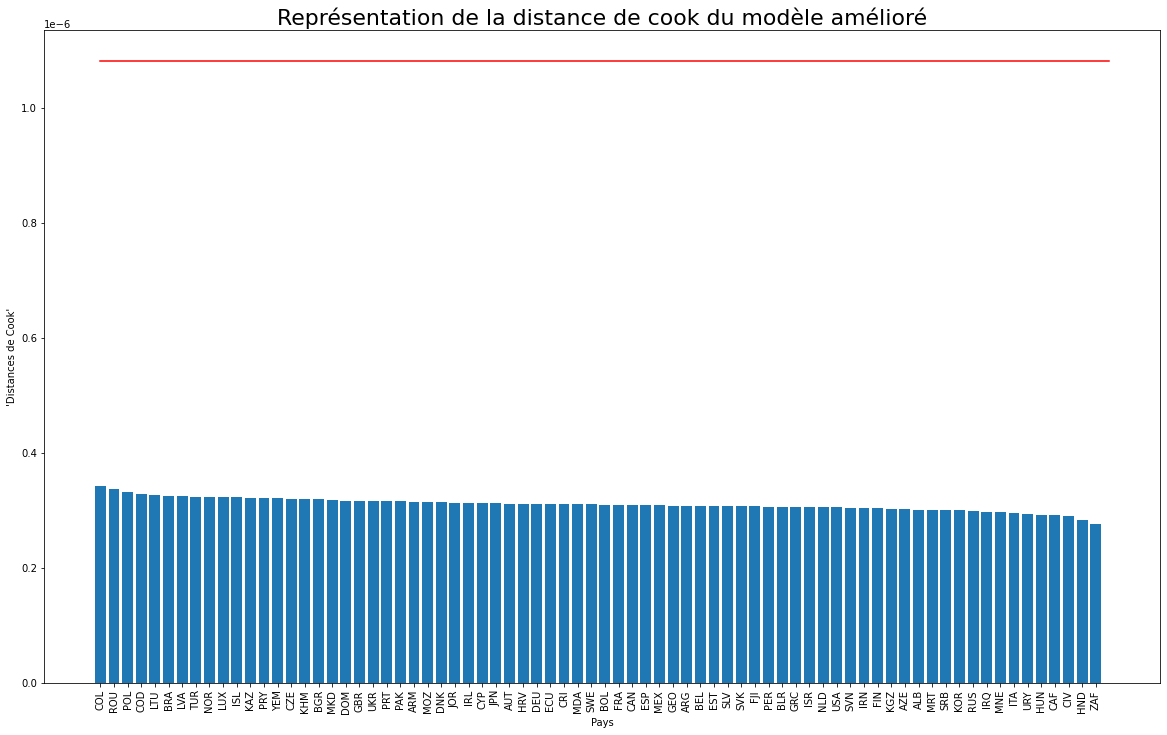

In [41]:
plt.figure(figsize=(20,12))

plt.bar(final_data_cook["ISO3"], final_data_cook['dcooks'])
plt.xticks(np.arange(0, 74, step=1), rotation='vertical')
plt.xlabel('Pays')
plt.ylabel("'Distances de Cook'")
plt.title("Représentation de la distance de cook du modèle amélioré", fontsize=22)
plt.plot([0, 74], [seuil_dcook, seuil_dcook], color='r')
plt.show()

In [42]:
  #Obeservations atypiques et influentes
p_atypique_influente = final_data.loc[((final_data['dcooks'] > seuil_dcook) &
                                  (final_data['rstudent'] > seuil_rstudent) &
                                  (final_data['levier'] > seuil_levier)) |
                                  ((final_data['dcooks'] > seuil_dcook) &
                                  (final_data['rstudent'] < -seuil_rstudent) &
                                  (final_data['levier'] > seuil_levier))]
p_atypique_influente 

,Pays,ISO3,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj,levier,rstudent,dcooks
3693552,Congo Democratic Republic of the,COD,58453687,100,196.641400,303.19305,0.459403,58.0,0.707703,11,276.016044,5.281382,5.620459,0.000003,3.345170,0.000001
609899,Cote d'Ivoire,CIV,19605568,100,2814.338900,1526.00000,0.430626,52.0,0.629976,3,399.835204,7.942483,5.991052,0.000003,3.344227,0.000002
3657790,Congo Democratic Republic of the,COD,58453687,100,564.684600,303.19305,0.459403,58.0,0.707703,80,276.016044,6.336267,5.620459,0.000003,3.343235,0.000002
3674625,Congo Democratic Republic of the,COD,58453687,100,116.524284,303.19305,0.459403,58.0,0.707703,76,276.016044,4.758100,5.620459,0.000003,3.342045,0.000001
3678798,Congo Democratic Republic of the,COD,58453687,100,1286.602900,303.19305,0.459403,58.0,0.707703,24,276.016044,7.159761,5.620459,0.000003,3.341203,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682948,Congo Democratic Republic of the,COD,58453687,100,181.073880,303.19305,0.459403,58.0,0.707703,16,276.016044,5.198905,5.620459,0.000003,-3.805264,0.000002
611554,Cote d'Ivoire,CIV,19605568,100,319.242800,1526.00000,0.430626,52.0,0.629976,93,399.835204,5.765952,5.991052,0.000003,-3.805314,0.000003
3670445,Congo Democratic Republic of the,COD,58453687,100,170.638820,303.19305,0.459403,58.0,0.707703,90,276.016044,5.139549,5.620459,0.000003,-3.805314,0.000004
619289,Cote d'Ivoire,CIV,19605568,100,751.761600,1526.00000,0.430626,52.0,0.629976,93,399.835204,6.622419,5.991052,0.000003,-3.805314,0.000004


In [43]:
# Pays avec les observations influentes et atypiques
pays_atypique_influente= final_data.loc[final_data.index.isin(p_atypique_influente.index)]
pays_atypique_influente.reset_index(inplace=True)
pays_atypique_influente.groupby('ISO3').count()

,index,Pays,population,nb_quantiles,ychild,gdpppp,gini,rank,pj,ci_parent,mj,ln_ychild,ln_mj,levier,rstudent,dcooks
ISO3,,,,,,,,,,,,,,,,
CAF,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
CIV,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299
COD,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855
COL,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
HND,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
PAK,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
ZAF,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110


## Vérifier la colinéarité des variables

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
variables = ln_reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.1529982766065392, 1.1529983867294562, 1.000000102708345]

## Testez l’homoscédasticité

In [46]:
import statsmodels

In [47]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


## Testez la normalité des résidus

### Test de Kolmogorov–Smirnov

In [48]:
print(ks_2samp(ln_reg_multi.resid, list(np.random.normal(np.mean(ln_reg_multi.resid),
                                        np.std(np.mean(ln_reg_multi.resid)) ,3699500))))

KstestResult(statistic=0.5002130017569941, pvalue=0.0)


In [49]:
residus_ln_reg_multi = ln_reg_multi.resid


### La droite d'Henry

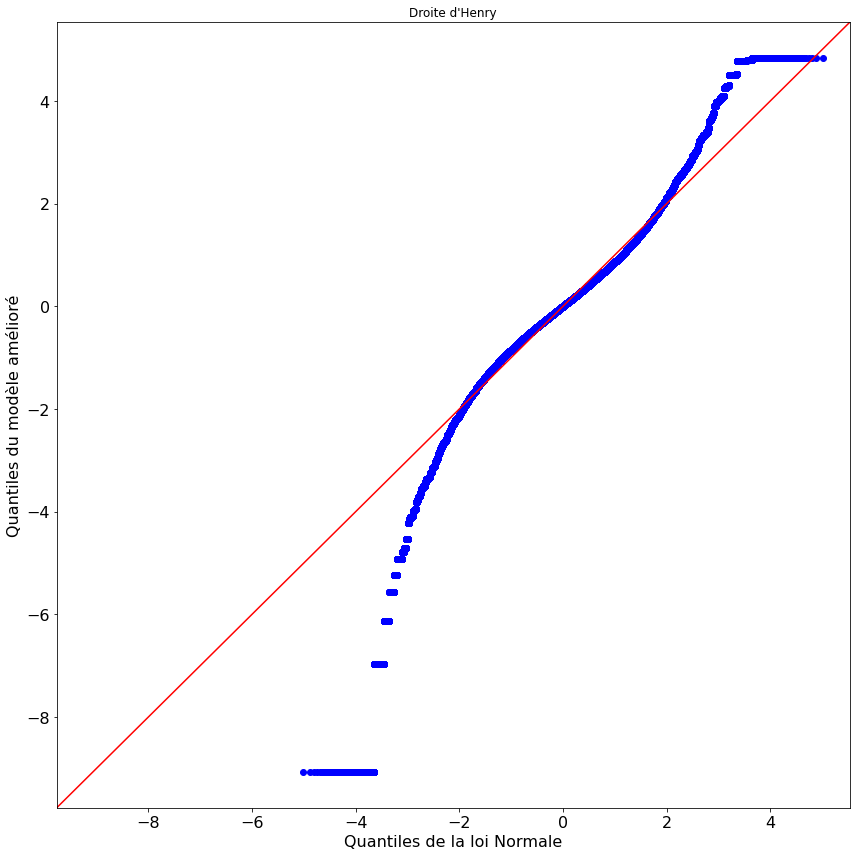

In [55]:
# Droite de Henry
fig, ax = plt.subplots(figsize=(12, 12))

sm.qqplot(residus_ln_reg_multi,line='45', fit=True, ax=ax)

plt.ylabel("Quantiles du modèle amélioré", fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Quantiles de la loi Normale", fontsize=16)
plt.xticks(fontsize=16)
plt.title("Droite d'Henry")

plt.tight_layout()

plt.savefig('Droite_henry.png')
plt.show()

### La courbe de distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


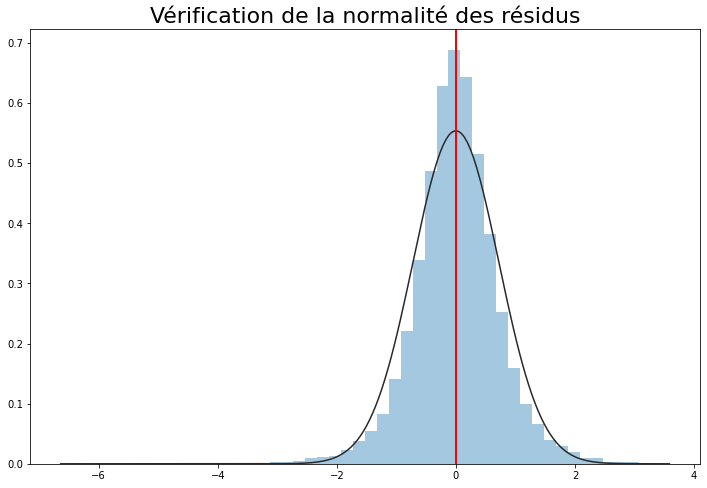

In [56]:
fig = plt.figure(figsize=(12,8))

ax = sn.distplot(ln_reg_multi.resid, fit=stats.norm, kde=False)

plt.axvline(np.mean(ln_reg_multi.resid), color='r', linewidth=2)

ax.set_title("Vérification de la normalité des résidus", fontsize=22)

plt.savefig('Normalité des résidus.png')
plt.show()